# First test with a cutting aggregate

## 1) Loading of the data

In [39]:
import load_inp
import meshio
import os.path
import numpy as np
import basic_functions as bf
import test_image_ellipsoid as tie
import bounding_box as bbox
import plot
import included_ellipsoid as ie
import bounding_ellipsoid as be
import scipy as scipy
from scipy import optimize
from scipy.optimize import minimize
from importlib import reload
import sys
import vtk
from vtk.util.numpy_support import vtk_to_numpy

In [10]:
load_inp.load_aggregate('\\Users\\DFSCHMIDT\\Documents\\Python_Scripts\\PJ1_roi1_aggregate1.inp')

AssertionError: Element type not available: CPS3

In [16]:
load_inp.load_aggregate('\\Users\\DFSCHMIDT\\Documents\\Python_Scripts\\MO1_surface_AbaqusInput.inp')

AssertionError: Element type not available: CPS3

load_inp does not work with .inp files    
Test with .stl files

In [29]:
load_inp.load_aggregate('\\Users\\DFSCHMIDT\\Documents\\Python_Scripts\\PJ1_roi#1_aggregate2_stlascii.stl')

In [34]:
print(mesh)

Number of points: 648287
Number of elements:
  triangle: 1296480


It is working with .stl files.    
Conversion of the produced .vtk files to an np.array   
**Recentering of the aggregate coordinates**

In [40]:
reader = vtk.vtkGenericDataObjectReader()
reader.SetFileName('PJ1_roi#1_aggregate2_stlascii.vtk')
reader.Update()

aggregate_coord = np.array( reader.GetOutput().GetPoints().GetData() )
aggregate_coord = aggregate_coord - bf.compute_center(aggregate_coord)

In [41]:
print(aggregate_coord.shape)

(648287, 3)


## 2) Aggregate Plot

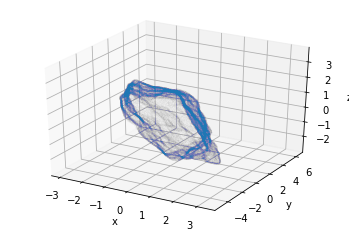

In [34]:
reload(plot)
plot.scatter_plot(aggregate_coord)

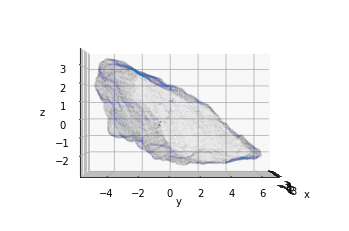

In [36]:
reload(plot)
plot.scatter_plot(aggregate_coord)

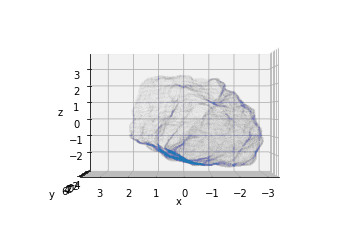

In [37]:
reload(plot)
plot.scatter_plot(aggregate_coord)

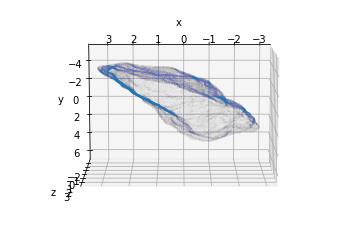

In [38]:
reload(plot)
plot.scatter_plot(aggregate_coord)

## 3) Bounding box

In [20]:
bbox_aggregate = bbox.bbox_optim(aggregate_coord)
plot.bbox_plot(aggregate_coord, bbox_aggregate)

RuntimeError: optimization failed:       fun: 241.0574406369636
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([33.87904144, 31.03461097])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 789
      nit: 34
   status: 2
  success: False
        x: array([-27.08269018, -13.84240734])

Plot with the failed optimization parameters to see how it looks like

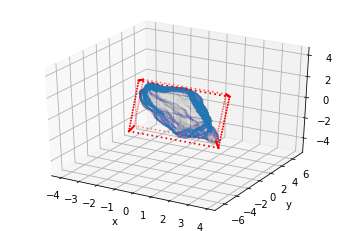

In [44]:
reload(plot)
plot.bbox_plot(aggregate_coord, {'angles': np.array([-27.08269018, -13.84240734]),
                                 'volume': 241.0574406369636})

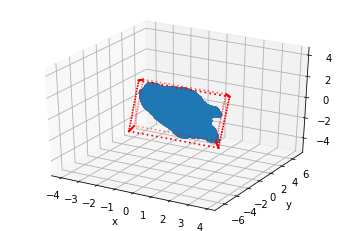

In [45]:
reload(plot)
plot.bbox_plot(aggregate_coord, {'angles': np.array([-27.08269018, -13.84240734]),
                                 'volume': 241.0574406369636})

Does not work with L-BFGS-B optimization algorythm    
Test with **Nelder-Mead** algorythm

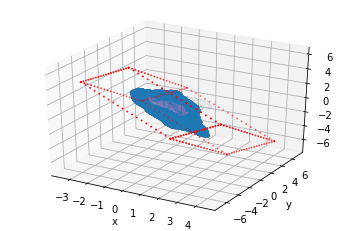

In [46]:
reload(bbox)
reload(plot)
bbox_aggregate = bbox.bbox_optim(aggregate_coord)
plot.bbox_plot(aggregate_coord, bbox_aggregate)

In [47]:
print(bbox_aggregate)

{'angles': array([-0.62187089,  0.90053396]), 'volume': 305.4135777779876}


## 4) Bounding ellipsoid

In [36]:
be.bounding_ellipsoid_optim(aggregate_coord)

{'volume': 491.4867279991664,
 'a': 2.502879671660242,
 'b': 8.731548289686232,
 'c': 5.368982077685452,
 'bbox': {'angles': array([-0.62187089,  0.90053396]),
  'volume': 305.4135777779876}}

Code modification in the bounding ellipsoid module:

Instead of:

Test with the new code (much faster)

In [49]:
reload(be)
bounding_ellipsoid = be.bounding_ellipsoid_optim(aggregate_coord)

In [50]:
print(bounding_ellipsoid)

{'volume': 491.4862647185707, 'a': 2.5028788852463677, 'b': 8.731545546202062, 'c': 5.368980390731795, 'bbox': {'angles': array([-0.62187089,  0.90053396]), 'volume': 305.4135777779876}}


Plot of the bounding ellipsoid with different points of view

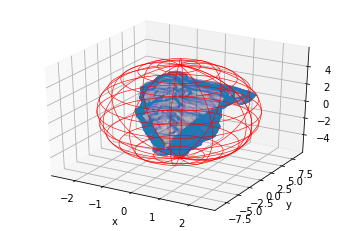

In [51]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=bounding_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, bounding_ellipsoid)

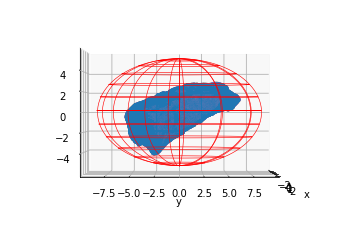

In [52]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=bounding_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, bounding_ellipsoid)

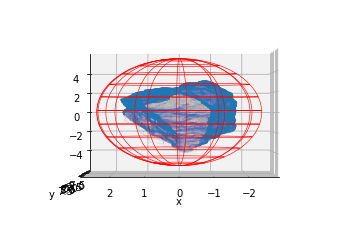

In [53]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=bounding_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, bounding_ellipsoid)

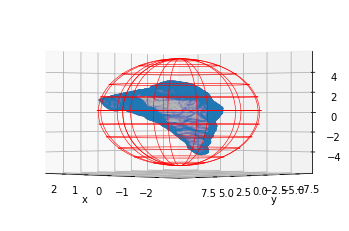

In [54]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=bounding_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, bounding_ellipsoid)

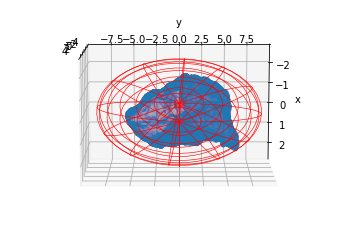

In [56]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=bounding_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, bounding_ellipsoid)

It seems there is little room on the z axis. Test with lower a (a=2.4 instead of 2.5)

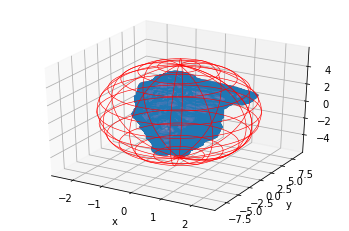

In [9]:
a = 2.4
b = 8.731548289686232
c = 5.368982077685452
ellipsoid = {'a': a, 'b': b, 'c': c}
aggregate_coord_rot = np.dot(aggregate_coord, bf.rotation(np.array([-0.62187089,  0.90053396])))
reload(plot)
plot.fit_ellipsoid_plot(aggregate_coord_rot, ellipsoid)

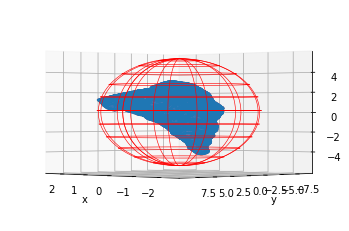

In [4]:
a = 2.4
b = 8.731548289686232
c = 5.368982077685452
ellipsoid = {'a': a, 'b': b, 'c': c}
aggregate_coord_rot = np.dot(aggregate_coord, bf.rotation(np.array([-0.62187089,  0.90053396])))
reload(plot)
plot.fit_ellipsoid_plot(aggregate_coord_rot, ellipsoid)

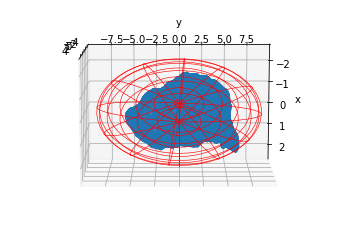

In [3]:
a = 2.4
b = 8.731548289686232
c = 5.368982077685452
ellipsoid = {'a': a, 'b': b, 'c': c}
aggregate_coord_rot = np.dot(aggregate_coord, bf.rotation(np.array([-0.62187089,  0.90053396])))
reload(plot)
plot.fit_ellipsoid_plot(aggregate_coord_rot, ellipsoid)

It is not a bounding ellipsoid anymore. The optimization was good!

## 4) Included ellipsoid

Code modification in the included ellipsoid module:

Instead of:

In [57]:
import included_ellipsoid as ie
reload(ie)

<module 'included_ellipsoid' from 'C:\\Users\\DFSCHMIDT\\Documents\\Python_Scripts\\included_ellipsoid.py'>

In [59]:
included_ellipsoid = ie.included_ellipsoid_optim(aggregate_coord, 1e-3)

In [60]:
print(included_ellipsoid)

{'volume': 1.0149838753825533, 'a': 0.3187296166258157, 'b': 1.1119204292691505, 'c': 0.6837138911102452, 'bbox': {'angles': array([-0.62187089,  0.90053396]), 'volume': 305.4135777779876}}


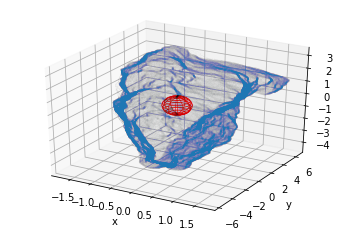

In [62]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=included_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, included_ellipsoid)

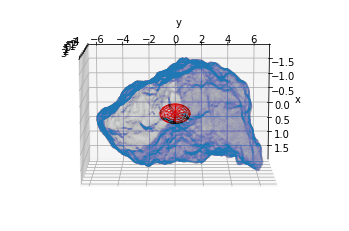

In [61]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=included_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, included_ellipsoid)

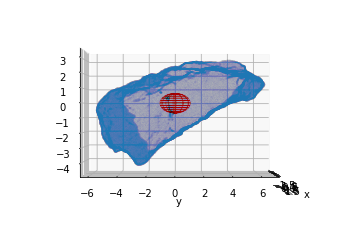

In [63]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=included_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, included_ellipsoid)

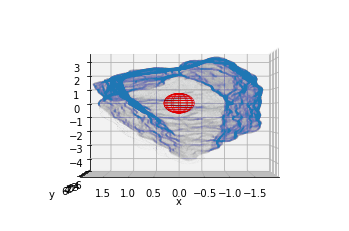

In [64]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=included_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, included_ellipsoid)

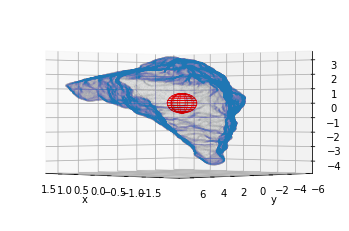

In [65]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=included_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, included_ellipsoid)

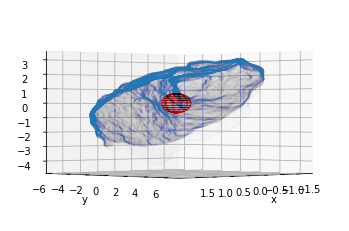

In [66]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=included_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, included_ellipsoid)

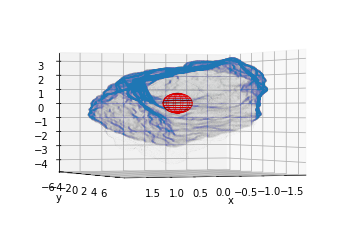

In [67]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=included_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, included_ellipsoid)

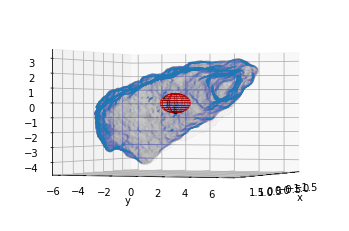

In [68]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=included_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, included_ellipsoid)

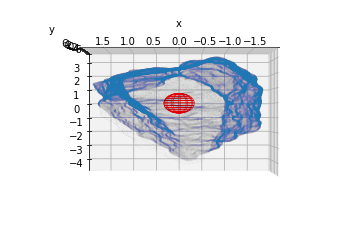

In [74]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=included_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, included_ellipsoid)

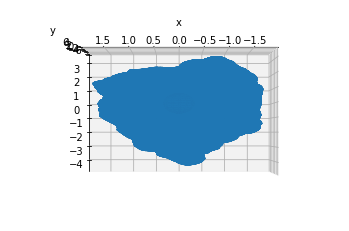

In [78]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=included_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, included_ellipsoid)

In [79]:
print(included_ellipsoid)

{'volume': 1.0149838753825533, 'a': 0.3187296166258157, 'b': 1.1119204292691505, 'c': 0.6837138911102452, 'bbox': {'angles': array([-0.62187089,  0.90053396]), 'volume': 305.4135777779876}}


In [82]:
false_ellipsoid = {'volume': 1.0149838753825533, 'a': 1.4187296166258157, 'b': 1.1119204292691505, 'c': 0.7837138911102452,
                   'bbox': {'angles': np.array([-0.62187089,  0.90053396]), 'volume': 305.4135777779876}}

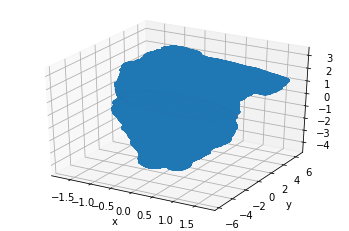

In [84]:
reload(plot)
rotated_aggregate = bf.rotate_aggregate(aggregate_coord,
                                        angles=false_ellipsoid['bbox']['angles'])
ax = plot.fit_ellipsoid_plot(rotated_aggregate, false_ellipsoid)